# NYC TLC 

## import field

In [53]:
import os
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

## 파일 목록 확인

In [41]:
NYC_TLC_data_files = os.listdir("NYC_TLC_data")
for file in NYC_TLC_data_files:
    df = spark.read.parquet("NYC_TLC_data/"+file)
    print(f"file_name: {file}")
    print(f'column len: {len(df.columns)}')
    print(df.columns)

file_name: green_tripdata_2024-03.parquet
column len: 20
['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge']
file_name: yellow_tripdata_2024-02.parquet
column len: 19
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
file_name: fhv_tripdata_2024-01.parquet
column len: 7
['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime', 'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number']
file_name: yellow_tripdata_2024-0

- yellow => 19개 컬럼
- green => 20개 컬럼
- green으로

In [58]:
# green 확인
columns = []
for file in NYC_TLC_data_files:
    if "green" in file:
        print(file)
        df = spark.read.parquet("NYC_TLC_data/"+file)
        print(f'column len: {len(df.columns)}')
        columns.append(df.columns)
for idx, ele in enumerate(columns[:-1]):
    if columns[idx] != columns[idx + 1]:
        print('컬럼 다른거 있음')

green_tripdata_2024-03.parquet
column len: 20
green_tripdata_2024-05.parquet
column len: 20
green_tripdata_2024-04.parquet
column len: 20
green_tripdata_2024-01.parquet
column len: 20
green_tripdata_2024-02.parquet
column len: 20


- 진짜 green으로

In [43]:
# green 끼리만 concat
concat_green_df = None

for file in NYC_TLC_data_files:
    if "green" in file:
        temp_df = spark.read.parquet("NYC_TLC_data/"+file)
        if concat_green_df is None:
            concat_green_df = temp_df
        else:
            concat_green_df = concat_green_df.union(temp_df)

# 보여줘 !
concat_green_df.show()

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|ehail_fee|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|       2| 2024-03-01 00:10:52|  2024-03-01 00:26:12|                 N|         1|         129|         226|              1|         1.72|       12.8|  1.0|    0.

## Data Handling

In [44]:
# 판다스로
green_df = concat_green_df.toPandas()
green_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-03-01 00:10:52,2024-03-01 00:26:12,N,1.0,129,226,1.0,1.72,12.80,1.0,0.5,3.06,0.0,NaN,1.0,18.36,1.0,1.0,0.00
1,2,2024-03-01 00:22:21,2024-03-01 00:35:15,N,1.0,130,218,1.0,3.25,17.70,1.0,0.5,0.00,0.0,NaN,1.0,20.20,2.0,1.0,0.00
2,2,2024-03-01 00:45:27,2024-03-01 01:04:32,N,1.0,255,107,2.0,4.58,23.30,1.0,0.5,3.50,0.0,NaN,1.0,32.05,1.0,1.0,2.75
3,1,2024-03-01 00:02:00,2024-03-01 00:23:45,N,1.0,181,71,1.0,0.00,22.50,0.0,1.5,0.00,0.0,NaN,1.0,24.00,1.0,1.0,0.00
4,2,2024-03-01 00:16:45,2024-03-01 00:23:25,N,1.0,95,135,1.0,1.15,8.60,1.0,0.5,1.00,0.0,NaN,1.0,12.10,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285054,2,2024-02-29 21:07:00,2024-02-29 21:34:00,None,NaN,223,137,NaN,5.43,32.16,0.0,0.0,7.18,0.0,NaN,1.0,43.09,NaN,NaN,NaN
285055,2,2024-02-29 22:35:38,2024-02-29 22:46:25,None,NaN,256,37,NaN,1.50,2.70,0.0,0.0,2.74,0.0,NaN,1.0,6.44,NaN,NaN,NaN
285056,2,2024-02-29 22:14:00,2024-02-29 22:39:00,None,NaN,75,33,NaN,10.07,47.14,0.0,0.0,15.27,0.0,NaN,1.0,66.16,NaN,NaN,NaN
285057,2,2024-02-29 22:41:00,2024-02-29 22:53:00,None,NaN,97,33,NaN,1.54,12.22,0.0,0.0,3.30,0.0,NaN,1.0,16.52,NaN,NaN,NaN


In [45]:
green_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285059 entries, 0 to 285058
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               285059 non-null  int32         
 1   lpep_pickup_datetime   285059 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  285059 non-null  datetime64[ns]
 3   store_and_fwd_flag     272739 non-null  object        
 4   RatecodeID             272739 non-null  float64       
 5   PULocationID           285059 non-null  int32         
 6   DOLocationID           285059 non-null  int32         
 7   passenger_count        272739 non-null  float64       
 8   trip_distance          285059 non-null  float64       
 9   fare_amount            285059 non-null  float64       
 10  extra                  285059 non-null  float64       
 11  mta_tax                285059 non-null  float64       
 12  tip_amount             285059 non-null  floa

In [46]:
green_df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,285059.000000,285059,285059,272739.000000,285059.000000,285059.000000,272739.000000,285059.000000,285059.000000,285059.000000,285059.000000,285059.000000,285059.000000,0.0,285059.000000,285059.000000,272739.000000,272702.000000,272739.000000
mean,1.878643,2024-03-17 23:40:56.517362688,2024-03-17 23:59:41.405744384,1.182937,96.201109,140.521229,1.309864,17.814367,17.491397,0.924487,0.573146,2.428550,0.210602,NaN,0.980361,23.202253,1.309776,1.038122,0.789731
min,1.000000,2008-12-31 23:02:24,2008-12-31 23:02:30,1.000000,1.000000,1.000000,0.000000,0.000000,-450.000000,-6.000000,-0.500000,-65.000000,-6.940000,NaN,-1.000000,-451.000000,1.000000,1.000000,-2.750000
25%,2.000000,2024-02-08 18:01:11.500000,2024-02-08 18:19:30,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.600000,1.000000,1.000000,0.000000
50%,2.000000,2024-03-18 10:46:45,2024-03-18 11:01:37,1.000000,75.000000,138.000000,1.000000,1.810000,13.500000,0.000000,0.500000,2.000000,0.000000,NaN,1.000000,18.840000,1.000000,1.000000,0.000000
75%,2.000000,2024-04-25 13:50:17.500000,2024-04-25 14:10:57.500000,1.000000,97.000000,225.000000,1.000000,3.140000,20.000000,2.500000,0.500000,3.690000,0.000000,NaN,1.000000,27.360000,2.000000,1.000000,2.750000
max,2.000000,2024-06-01 00:00:56,2024-06-01 21:12:50,99.000000,265.000000,265.000000,9.000000,201421.680000,1422.600000,12.000000,4.250000,343.240000,46.760000,NaN,1.000000,1424.100000,5.000000,2.000000,2.750000
std,0.326543,NaN,NaN,1.391051,57.565568,76.421175,0.966565,989.897265,15.356206,1.386396,0.367892,3.207152,1.262343,NaN,0.152575,17.384453,0.494073,0.191492,1.243214


- Datetime 관련 컬럼 (lpep_pickup_datetime, lpep_dropoff_datetime)
    - min에서 2008년? 값 발견 => 이상치로 간주 => 삭제
- trip_distance에서 201421.680000가 max값
    - 이상치로 간주 => +-3sigma인 row만 대상으로
- fare_amount에서 max가 1422.600000
    - 여기서도 +-3sigma인 row만 대상으로
- extra, mta_tax, tip_amount, tolls_amount, congestion_surcharge에 왜 음수값이 존재하는거지 ?
    - 음수값 row 삭제
- total_amount에서도 +-3sigma 안의 행만 추출

In [47]:
import pandas as pd

# Datetime 관련 컬럼 (lpep_pickup_datetime, lpep_dropoff_datetime)에서 2008년 이전 데이터 삭제
green_df = green_df[(green_df['lpep_pickup_datetime'] >= '2024-01-01') & (green_df['lpep_dropoff_datetime'] >= '2024-01-01')]

# trip_distance에서 +-3sigma 범위 내의 값만 남기기
trip_distance_mean = green_df['trip_distance'].mean()
trip_distance_std = green_df['trip_distance'].std()
green_df = green_df[(green_df['trip_distance'] >= trip_distance_mean - 3 * trip_distance_std) &
                    (green_df['trip_distance'] <= trip_distance_mean + 3 * trip_distance_std)]

# fare_amount에서 +-3sigma 범위 내의 값만 남기기
fare_amount_mean = green_df['fare_amount'].mean()
fare_amount_std = green_df['fare_amount'].std()
green_df = green_df[(green_df['fare_amount'] >= fare_amount_mean - 3 * fare_amount_std) &
                    (green_df['fare_amount'] <= fare_amount_mean + 3 * fare_amount_std)]

# extra, mta_tax, tip_amount, tolls_amount, congestion_surcharge에서 음수값 제거
green_df = green_df[(green_df['extra'] >= 0) & 
                    (green_df['mta_tax'] >= 0) & 
                    (green_df['tip_amount'] >= 0) & 
                    (green_df['tolls_amount'] >= 0) & 
                    (green_df['congestion_surcharge'] >= 0)]

# total_amount에서 +-3sigma 범위 내의 값만 남기기
total_amount_mean = green_df['total_amount'].mean()
total_amount_std = green_df['total_amount'].std()
green_df = green_df[(green_df['total_amount'] >= total_amount_mean - 3 * total_amount_std) &
                    (green_df['total_amount'] <= total_amount_mean + 3 * total_amount_std)]


In [48]:
green_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-03-01 00:10:52,2024-03-01 00:26:12,N,1.0,129,226,1.0,1.72,12.8,1.0,0.5,3.06,0.0,NaN,1.0,18.36,1.0,1.0,0.00
1,2,2024-03-01 00:22:21,2024-03-01 00:35:15,N,1.0,130,218,1.0,3.25,17.7,1.0,0.5,0.00,0.0,NaN,1.0,20.20,2.0,1.0,0.00
2,2,2024-03-01 00:45:27,2024-03-01 01:04:32,N,1.0,255,107,2.0,4.58,23.3,1.0,0.5,3.50,0.0,NaN,1.0,32.05,1.0,1.0,2.75
3,1,2024-03-01 00:02:00,2024-03-01 00:23:45,N,1.0,181,71,1.0,0.00,22.5,0.0,1.5,0.00,0.0,NaN,1.0,24.00,1.0,1.0,0.00
4,2,2024-03-01 00:16:45,2024-03-01 00:23:25,N,1.0,95,135,1.0,1.15,8.6,1.0,0.5,1.00,0.0,NaN,1.0,12.10,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282126,2,2024-02-29 23:18:24,2024-02-29 23:22:40,N,1.0,66,33,1.0,0.63,5.8,1.0,0.5,1.66,0.0,NaN,1.0,9.96,1.0,1.0,0.00
282127,2,2024-02-29 23:14:43,2024-02-29 23:19:14,N,1.0,95,95,1.0,0.72,7.2,1.0,0.5,0.00,0.0,NaN,1.0,9.70,2.0,1.0,0.00
282128,2,2024-02-29 23:20:12,2024-02-29 23:29:59,N,1.0,95,56,1.0,1.64,11.4,1.0,0.5,0.00,0.0,NaN,1.0,13.90,2.0,1.0,0.00
282129,2,2024-02-29 23:26:22,2024-02-29 23:42:16,N,1.0,74,244,1.0,2.98,17.0,1.0,0.5,3.90,0.0,NaN,1.0,23.40,1.0,1.0,0.00


## Calculation of Metrics
- 평균 여행 시간
- 평균 여행 거리

In [50]:
# 평균 여행 시간
green_df['trip_duration_minutes'] = (green_df['lpep_dropoff_datetime'] - green_df['lpep_pickup_datetime']).dt.total_seconds() / 60

# 평균 여행 시간 계산
average_trip_duration = green_df['trip_duration_minutes'].mean()

print(f'평균 여행 시간: {average_trip_duration}')

평균 여행 시간: 17.469449271717018


In [52]:
# 평균 여행 거리
average_trip_distance = green_df['trip_distance'].mean()

print(f'평균 여행 거리: {average_trip_distance}')


평균 여행 거리: 2.2802639882925932


## 피크 타임

피크 시간: 17시, 택시 이용 횟수: 21576


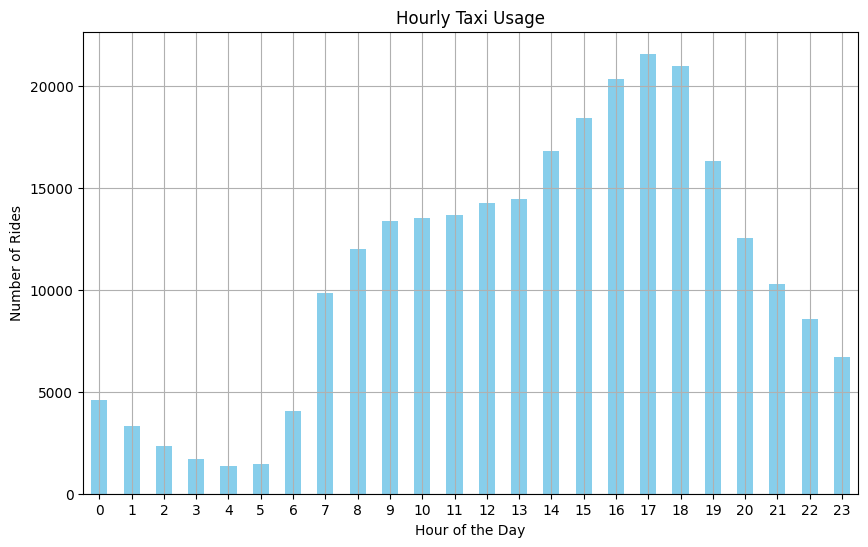

In [55]:
import matplotlib.pyplot as plt

# lpep_pickup_datetime에서 시간 추출
green_df['pickup_hour'] = green_df['lpep_pickup_datetime'].dt.hour

hourly_counts = green_df['pickup_hour'].value_counts().sort_index()

peak_hour = hourly_counts.idxmax()
peak_hour_count = hourly_counts.max()

# 결과
print(f"피크 시간: {peak_hour}시, 택시 이용 횟수: {peak_hour_count}")

# 시각화
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Hourly Taxi Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## 날씨와의 관계는 ? 
- 1월 사용


In [100]:
# 가장 빠른 시간
earliest_time = green_df['lpep_pickup_datetime'].min()

# 가장 늦은 시간
latest_time = green_df['lpep_pickup_datetime'].max()

# 결과 출력
print(f"가장 빠른 시간: {earliest_time}")
print(f"가장 늦은 시간: {latest_time}")


가장 빠른 시간: 2024-01-01 00:03:57
가장 늦은 시간: 2024-06-01 00:00:56


In [101]:
weather_file_path = "jan_2024_weather_data.csv"
weather_df = spark.read.option("header", "true").csv(weather_file_path)
weather_df.show()

+-------------------+-----------+--------+----------+--------+---------+
|           Datetime|Temperature|Humidity|Wind Speed|Pressure|Condition|
+-------------------+-----------+--------+----------+--------+---------+
|2024-01-01 00:51:00|       2.22|     64%|      8mph|   30.06|     Fair|
|2024-01-01 00:52:00|       2.22|     64%|      8mph|   30.06|     Fair|
|2024-01-01 00:53:00|       2.22|     64%|      8mph|   30.06|     Fair|
|2024-01-01 00:54:00|       2.22|     64%|      8mph|   30.06|     Fair|
|2024-01-01 00:55:00|       2.22|     64%|      8mph|   30.06|     Fair|
|2024-01-01 00:56:00|       2.22|     64%|      8mph|   30.06|     Fair|
|2024-01-01 00:57:00|       2.22|     64%|      8mph|   30.06|     Fair|
|2024-01-01 00:58:00|       2.22|     64%|      8mph|   30.06|     Fair|
|2024-01-01 00:59:00|       2.22|     64%|      8mph|   30.06|     Fair|
|2024-01-01 01:00:00|       2.22|     64%|      8mph|   30.06|     Fair|
|2024-01-01 01:01:00|       2.22|     64%|      8mp

In [102]:
weather_df = weather_df.toPandas()

In [103]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218829 entries, 0 to 218828
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Datetime     218829 non-null  object
 1   Temperature  218829 non-null  object
 2   Humidity     218829 non-null  object
 3   Wind Speed   218829 non-null  object
 4   Pressure     218829 non-null  object
 5   Condition    218829 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [104]:
weather_df.describe()

,Datetime,Temperature,Humidity,Wind Speed,Pressure,Condition
count,218829,218829,218829,218829,218829,218829
unique,218829,40,70,29,136,23
top,2024-01-01 00:51:00,3.89,70%,3mph,30.06,Cloudy
freq,1,131924,130628,131059,130634,185555


Temperature_Bin
(-7, -6]       6
(-6, -5]      18
(-5, -4]      22
(-4, -3]      29
(-3, -2]      34
(-2, -1]      53
(-1, 0]       27
(0, 1]        21
(1, 2]        50
(2, 3]       107
(3, 4]      2780
(4, 5]        79
(5, 6]        44
(6, 7]      1059
(7, 8]        54
(8, 9]        30
(9, 10]       17
(10, 11]       9
(11, 12]      23
(12, 13]      20
Name: count, dtype: int64


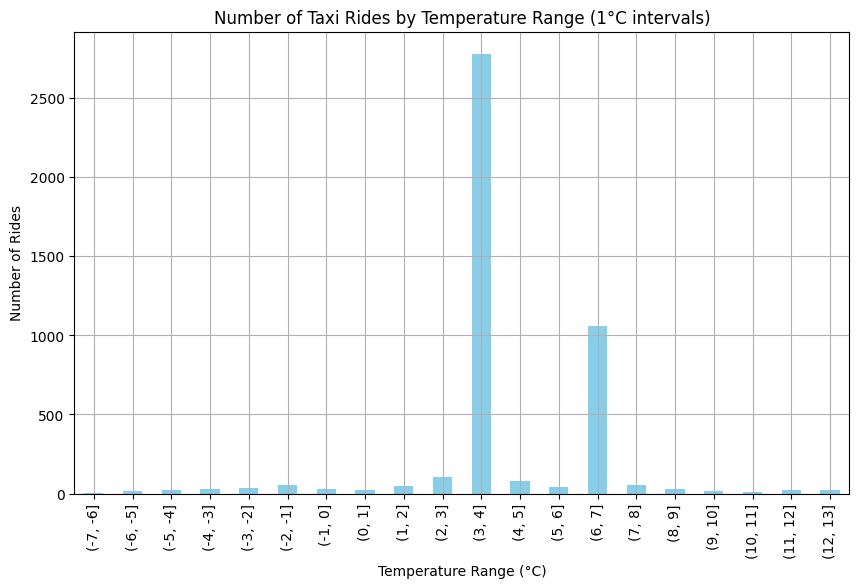

In [105]:
import pandas as pd
import numpy as np

weather_df['Datetime'] = pd.to_datetime(weather_df['Datetime'])
green_df['lpep_pickup_datetime'] = pd.to_datetime(green_df['lpep_pickup_datetime'])

# Temperature 컬럼을 수치형으로 변환 (단위 제거 후 변환)
weather_df['Temperature'] = pd.to_numeric(weather_df['Temperature'].str.replace('°C', ''), errors='coerce')

merged_df = pd.merge(green_df, weather_df, left_on='lpep_pickup_datetime', right_on='Datetime', how='inner')

# 온도대를 1도 간격으로 구분
temperature_bins = np.arange(int(merged_df['Temperature'].min()), 
                             int(merged_df['Temperature'].max()) + 1, 1)
merged_df['Temperature_Bin'] = pd.cut(merged_df['Temperature'], bins=temperature_bins)

temperature_bin_counts = merged_df['Temperature_Bin'].value_counts().sort_index()

print(temperature_bin_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
temperature_bin_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Taxi Rides by Temperature Range (1°C intervals)')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()
